In [91]:
options(repr.plot.width=4, repr.plot.height=3)
require(venn)
require(limma)
require(biomaRt)
require(tidyverse)


In [92]:
binary.glist<- readRDS('../dat/1901/binary.glist.Rds')
t(lapply(binary.glist,length))

alpha1_tr,alpha1,alpha2,alpha2_tr,beta1_tr,beta1,beta2,beta2_tr
185,179,1967,2042,182,178,682,696


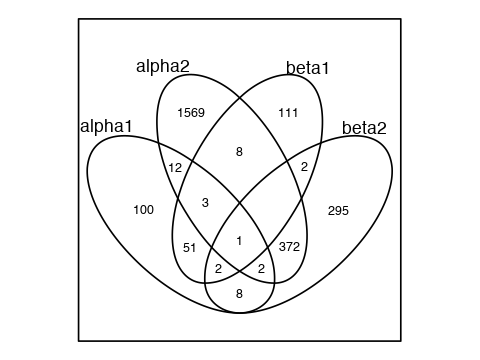

In [93]:
venn(binary.glist[c('alpha1','alpha2','beta1','beta2')],ellipse = T)

#### Many genes overlapped between alpha1, beta1 and alpha2, beta2. When we do GO enrichment, we can select background genes to highlight the contrast. 

## 0. prepare entrez gene ids

In [94]:
ensembl = useEnsembl(biomart="ensembl", dataset="hsapiens_gene_ensembl")
binary.glist.2 <- lapply(binary.glist,
                         function(x) getBM(attributes=c('entrezgene','hgnc_symbol'), 
      filters ='hgnc_symbol', 
      values =x,mart=ensembl)$entrezgene)
                         

In [95]:
t(lapply(binary.glist,length))
t(lapply(binary.glist.2,length))

alpha1_tr,alpha1,alpha2,alpha2_tr,beta1_tr,beta1,beta2,beta2_tr
185,179,1967,2042,182,178,682,696


alpha1_tr,alpha1,alpha2,alpha2_tr,beta1_tr,beta1,beta2,beta2_tr
0,171,1869,0,0,170,647,0


## 1. against default background genes


In [98]:
go.fisher<- goana(de = binary.glist.2[c('alpha1','alpha2','beta1','beta2')])
topGO(go.fisher, sort = "alpha1",n=5,ontology = "BP")
topGO(go.fisher, sort = "alpha2",n=5,ontology = "BP")
topGO(go.fisher, sort = "beta1",n=5,ontology = "BP")
topGO(go.fisher, sort = "beta2",n=5,ontology = "BP")

,Term,Ont,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
GO:0051049,regulation of transport,BP,1821,38,203,27,87,1.891180e-07,0.003683346,3.481636e-03,0.0001504900
GO:1903530,regulation of secretion by cell,BP,687,21,74,16,33,4.694279e-07,0.108625172,2.903282e-04,0.0163500838
GO:0051046,regulation of secretion,BP,741,21,79,16,33,1.581957e-06,0.117867343,6.617219e-04,0.0414717165
GO:0010817,regulation of hormone levels,BP,510,16,56,14,28,8.606230e-06,0.114761086,1.336071e-04,0.0049193138
GO:0030073,insulin secretion,BP,202,10,27,10,16,1.001507e-05,0.036881926,1.001507e-05,0.0009392171


,Term,Ont,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
GO:0006996,organelle organization,BP,3888,37,551,31,184,0.26771325,1.855982e-28,0.7070512,1.386576e-08
GO:0071840,cellular component organization or biogenesis,BP,6486,64,810,56,273,0.09936706,9.839593e-26,0.5077323,8.217552e-08
GO:0016043,cellular component organization,BP,6269,63,786,56,269,0.07551460,3.352447e-25,0.3859512,1.646534e-08
GO:0044237,cellular metabolic process,BP,10957,91,1224,85,446,0.71163186,5.089079e-24,0.9323033,3.258666e-14
GO:0008152,metabolic process,BP,11746,94,1278,94,461,0.87731451,1.603369e-20,0.8773145,7.861924e-12


,Term,Ont,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
GO:0090276,regulation of peptide hormone secretion,BP,203,9,26,11,13,6.634710e-05,0.06140966,1.485791e-06,0.0154034279
GO:0050796,regulation of insulin secretion,BP,172,9,24,10,13,1.811124e-05,0.03042751,2.401945e-06,0.0040867850
GO:0030072,peptide hormone secretion,BP,243,10,29,11,16,4.892033e-05,0.10216323,8.380245e-06,0.0059751357
GO:0030073,insulin secretion,BP,202,10,27,10,16,1.001507e-05,0.03688193,1.001507e-05,0.0009392171
GO:0046883,regulation of hormone secretion,BP,261,10,31,11,16,8.877246e-05,0.09820413,1.637109e-05,0.0114450328


,Term,Ont,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
GO:0044237,cellular metabolic process,BP,10957,91,1224,85,446,0.7116319,5.089079e-24,0.9323033,3.258666e-14
GO:0008152,metabolic process,BP,11746,94,1278,94,461,0.8773145,1.603369e-20,0.8773145,7.861924e-12
GO:0006807,nitrogen compound metabolic process,BP,10390,76,1141,76,417,0.9833800,1.708409e-17,0.9833800,3.463658e-11
GO:0071704,organic substance metabolic process,BP,11249,89,1222,92,442,0.8971817,3.986233e-18,0.7872514,7.975057e-11
GO:0043170,macromolecule metabolic process,BP,9622,67,1071,71,391,0.9939483,1.312162e-17,0.9701078,9.130184e-11


In [96]:
kegg.fisher<- kegga(de = binary.glist.2[c('alpha1','alpha2','beta1','beta2')])
topKEGG(kegg.fisher, sort = "alpha1",n=5)
topKEGG(kegg.fisher, sort = "alpha2",n=5)
topKEGG(kegg.fisher, sort = "beta1",n=5)
topKEGG(kegg.fisher, sort = "beta2",n=5)

,Pathway,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
path:hsa04911,Insulin secretion,85,6,11,5,5,0.0001653857,0.22360846,0.0008079429,0.18558413
path:hsa04950,Maturity onset diabetes of the young,26,3,2,3,0,0.0019639030,0.74765985,0.0014048307,1.00000000
path:hsa04922,Glucagon signaling pathway,103,5,13,2,8,0.0031909752,0.22389430,0.2246676827,0.03017449
path:hsa04930,Type II diabetes mellitus,46,3,9,4,3,0.0099788044,0.03528495,0.0006403218,0.22471951
path:hsa00730,Thiamine metabolism,16,2,0,0,0,0.0102853438,1.00000000,1.0000000000,1.00000000


,Pathway,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
path:hsa04144,Endocytosis,244,1,51,2,14,0.9118399,1.732576e-07,0.6305786,0.053092163
path:hsa05211,Renal cell carcinoma,69,0,22,0,7,1.0000000,4.308603e-07,1.0000000,0.011045617
path:hsa04218,Cellular senescence,160,0,36,1,14,1.0000000,1.936239e-06,0.7556338,0.001650944
path:hsa05220,Chronic myeloid leukemia,76,2,22,1,6,0.1690266,2.700412e-06,0.4859883,0.053100296
path:hsa05223,Non-small cell lung cancer,66,0,20,0,1,1.0000000,3.516531e-06,1.0000000,0.909766956


,Pathway,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
path:hsa04930,Type II diabetes mellitus,46,3,9,4,3,0.0099788044,0.03528495,0.0006403218,0.2247195
path:hsa04911,Insulin secretion,85,6,11,5,5,0.0001653857,0.22360846,0.0008079429,0.1855841
path:hsa04950,Maturity onset diabetes of the young,26,3,2,3,0,0.0019639030,0.74765985,0.0014048307,1.0000000
path:hsa00564,Glycerophospholipid metabolism,97,1,11,4,3,0.6155015063,0.37307898,0.0097804553,0.6777651
path:hsa01100,Metabolic pathways,1265,12,141,18,45,0.5894395773,0.07064703,0.0193389985,0.5314140


,Pathway,N,alpha1,alpha2,beta1,beta2,P.alpha1,P.alpha2,P.beta1,P.beta2
path:hsa04010,MAPK signaling pathway,295,1,53,4,24,0.9474815,1.262753e-05,0.2526905,0.0001251041
path:hsa04520,Adherens junction,72,2,16,0,9,0.1552734,1.596194e-03,1.0000000,0.0009633620
path:hsa04218,Cellular senescence,160,0,36,1,14,1.0000000,1.936239e-06,0.7556338,0.0016509437
path:hsa05200,Pathways in cancer,526,7,76,3,32,0.2506041,4.505183e-04,0.8445478,0.0019021736
path:hsa04141,Protein processing in endoplasmic reticulum,165,2,31,3,14,0.4806018,3.609306e-04,0.1719172,0.0022075186


In [21]:
go.fisher.a1 <- goana(binary.glist.2$alpha1,
                      universe = unique(c(binary.glist.2$alpha1,
                                         binary.glist.2$alpha2)),
                     species="Hs")

In [28]:
head(go.fisher.a1%>%arrange(P.DE)%>%filter(Ont=="BP"),n=10)

Term,Ont,N,DE,P.DE
regulation of secretion by cell,BP,94,21,1.391130e-05
regulation of transport,BP,241,38,3.235333e-05
regulation of secretion,BP,100,21,3.816344e-05
cation transport,BP,120,23,7.438750e-05
regulation of ion transport,BP,75,17,8.033435e-05
system process,BP,162,28,8.253056e-05
regulation of hormone levels,BP,71,16,1.418742e-04
muscle system process,BP,52,13,2.038744e-04
hormone transport,BP,48,12,3.611289e-04
protein secretion,BP,70,15,4.171163e-04


##### a1 vs. a1+a2

In [31]:
kegg.fisher.a1 <- kegga(binary.glist.2$alpha1,
                      universe = unique(c(binary.glist.2$alpha1,
                                         binary.glist.2$alpha2)),
                     species="Hs")
head(kegg.fisher.a1%>%arrange(P.DE),n=10)

Pathway,N,DE,P.DE
Insulin secretion,16,6,0.001189690
Maturity onset diabetes of the young,4,3,0.002114316
Neuroactive ligand-receptor interaction,8,4,0.002463684
Thiamine metabolism,2,2,0.006855199
Glucagon signaling pathway,16,5,0.007636628
Wnt signaling pathway,19,5,0.016571694
Terpenoid backbone biosynthesis,3,2,0.019439432
Tyrosine metabolism,4,2,0.036764547
Type II diabetes mellitus,11,3,0.056444938
Protein digestion and absorption,5,2,0.057965454


##### a2 vs. a1+a2

In [32]:
kegg.fisher.a2 <- kegga(binary.glist.2$alpha2,
                      universe = unique(c(binary.glist.2$alpha1,
                                         binary.glist.2$alpha2)),
                     species="Hs")
head(kegg.fisher.a2%>%arrange(P.DE),n=10)

Pathway,N,DE,P.DE
Endocytosis,51,51,0.01891871
Cellular senescence,37,37,0.05679536
Rap1 signaling pathway,34,34,0.07180888
MAPK signaling pathway,55,54,0.07614180
Hepatocellular carcinoma,31,31,0.09075895
MicroRNAs in cancer,28,28,0.11466932
Huntington disease,26,26,0.13398845
Gastric cancer,26,26,0.13398845
RNA transport,25,25,0.14482781
Cell cycle,24,24,0.15653793


##### a2 vs. all

In [36]:
kegg.fisher.a2.2 <- kegga(binary.glist.2$alpha2,
                     species="Hs")
topKEGG(kegg.fisher.a2.2,n=10)

,Pathway,N,DE,P.DE
path:hsa04144,Endocytosis,244,51,4.320560e-07
path:hsa05211,Renal cell carcinoma,69,22,7.123226e-07
path:hsa04218,Cellular senescence,160,37,1.394000e-06
path:hsa05220,Chronic myeloid leukemia,76,22,4.370568e-06
path:hsa05223,Non-small cell lung cancer,66,20,5.499460e-06
path:hsa05210,Colorectal cancer,86,23,1.148469e-05
path:hsa04010,MAPK signaling pathway,295,54,1.388235e-05
path:hsa05166,Human T-cell leukemia virus 1 infection,219,43,1.852452e-05
path:hsa05213,Endometrial cancer,58,17,4.463947e-05
path:hsa04722,Neurotrophin signaling pathway,119,27,5.272815e-05


##### a2 vs. a1

In [37]:
kegg.fisher.a2.2 <- kegga(binary.glist.2$alpha2,
                          universe = binary.glist.2$alpha1,
                     species="Hs")
topKEGG(kegg.fisher.a2.2,n=10)

,Pathway,N,DE,P.DE
path:hsa04910,Insulin signaling pathway,3,2,0.03183826
path:hsa04922,Glucagon signaling pathway,5,2,0.09269414
path:hsa04310,Wnt signaling pathway,5,2,0.09269414
path:hsa00520,Amino sugar and nucleotide sugar metabolism,1,1,0.10919540
path:hsa04152,AMPK signaling pathway,1,1,0.10919540
path:hsa04371,Apelin signaling pathway,1,1,0.10919540
path:hsa05414,Dilated cardiomyopathy (DCM),1,1,0.10919540
path:hsa04144,Endocytosis,1,1,0.10919540
path:hsa00052,Galactose metabolism,1,1,0.10919540
path:hsa05016,Huntington disease,1,1,0.10919540


##### a1 vs. a2

In [38]:
kegg.fisher.a2.2 <- kegga(binary.glist.2$alpha1,
                          universe = binary.glist.2$alpha2,
                     species="Hs")
topKEGG(kegg.fisher.a2.2,n=10)

,Pathway,N,DE,P.DE
path:hsa04922,Glucagon signaling pathway,13,2,0.006642609
path:hsa00524,"Neomycin, kanamycin and gentamicin biosynthesis",1,1,0.009788769
path:hsa04310,Wnt signaling pathway,16,2,0.010042013
path:hsa04950,Maturity onset diabetes of the young,2,1,0.019486714
path:hsa04910,Insulin signaling pathway,24,2,0.022045105
path:hsa00052,Galactose metabolism,4,1,0.038613312
path:hsa04330,Notch signaling pathway,5,1,0.048043537
path:hsa00500,Starch and sucrose metabolism,5,1,0.048043537
path:hsa04260,Cardiac muscle contraction,8,1,0.075811223
path:hsa00010,Glycolysis / Gluconeogenesis,8,1,0.075811223


In [77]:
require(org.Hs.eg.db)
x <-  org.Hs.egENSEMBL

length(mappedkeys(x))
org.Hs.eg.db[['ENTREZID']]

[1] 26116

NULL